# Importing Libraries


In [1]:
#Load the libraries
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings #To avoid any warnings
warnings.filterwarnings(action="ignore")
import datetime as dt # To work with Time date data set

# 1) Data Understanding

## Importing Data

In [2]:
df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Checking for the columns having more than 80% Null values

In [4]:
df.columns[100*df.isnull().mean() > 80]

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [5]:
# As this columns have very high percentage of null values, this can be dropped from the analysis
Null_cols = ['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit']
df = df.drop(Null_cols, axis = 1)
df.shape

(39717, 55)

## Deleting Customer behaviour columns

In [6]:
#The following customer behavior variables are not available at the time of loan application. This are post loan approval variables
#thus they cannot be used as predictors for credit approval This variables are listed below and they can be removed
cust_behav_cols = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc',
                  'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                  'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']
df = df.drop(cust_behav_cols, axis = 1)
df.shape

(39717, 34)

In [7]:
# checking available columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

## Deleting single valued data Columns

In [8]:
# It is observed that, many columns have single value e.g. pymnt_plan column has single value 'n'. 
#Such columns are identified and deleted

single_value_cols = ['pymnt_plan', 'collections_12_mths_ex_med', 'policy_code', 'delinq_amnt', 'acc_now_delinq', 'tax_liens',
                      'chargeoff_within_12_mths']
df = df.drop(single_value_cols, axis = 1)
df.shape

(39717, 27)

## Deleting non-essential Columns

In [9]:
# There are few columns which does not contribute to analysis, this are identified and deleted

non_essential_cols = ['id','member_id','emp_title','url','desc','title','zip_code','mths_since_last_delinq',
                      'initial_list_status']
df = df.drop(non_essential_cols, axis = 1)
df.shape


(39717, 18)

In [10]:
# Columns available for analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

# 2) Data Cleaning and Imputation

### Null value detection and imputation

In [11]:
# checking for null values present in the dataset
100*df.isnull().mean()

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

In [12]:
# Null value treatment for 'emp_length' column

# checking value count for emp_length column
df['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [13]:
# Replacing null values by mode value in emp_length column
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

# checking null value count
df['emp_length'].isnull().mean()

0.0

In [14]:
# Null value treatment for 'pub_rec_bankruptcies' columnn

# checking value count for pub_rec_bankruptcies column
df['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [15]:
# Replacing null values by mode value in emp_length column
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0])

# checking null value count
df['pub_rec_bankruptcies'].isnull().mean()

0.0

In [16]:
# checking for null value count again in dataset
100*df.isnull().mean()

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

### int_rate column Treatment

In [17]:
# checking value count
df['int_rate'].value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64

In [18]:
# removing percentage symbol and converting it into float datatype
df['int_rate'] = df['int_rate'].apply(lambda x: float(x[:-1]))

df['int_rate'].value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64

In [19]:
# Binning int_rate into categories
df['bin_int_rate'] = pd.cut(df['int_rate'], bins=4,precision =0,labels=['5-10','10-15','15-20','20-25'])
df['bin_int_rate'].head()

0    10-15
1    15-20
2    15-20
3    10-15
4    10-15
Name: bin_int_rate, dtype: category
Categories (4, object): ['5-10' < '10-15' < '15-20' < '20-25']

### emp_length column Treatment

In [20]:
# emp_length dataset value count
df['emp_length'].value_counts()

10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [21]:
# replacing ''< 1 year' employment length by 0 and '10+ years' by 10 and converting data type to 'Integer'
df['emp_length'] = df['emp_length'].apply(lambda x: 0 if x=='< 1 year' else(10 if x=='10+ years' else int(x[0])))
df['emp_length'].value_counts()

10    9954
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

### issue_d column Treatment

In [22]:
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [23]:
df['issue_month'] = df['issue_d'].apply(lambda x: x.split('-')[0])
df['issue_year'] = df['issue_d'].apply(lambda x : '20' + x.split('-')[1])
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,bin_int_rate,issue_month,issue_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0,10-15,Dec,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,...,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0,15-20,Dec,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0,15-20,Dec,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0,10-15,Dec,2011
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,...,Source Verified,Dec-11,Current,other,OR,17.94,0.0,10-15,Dec,2011


### loan_status column Treatment

In [24]:
# checking value count
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [25]:
# The ones marked 'current' are neither fully paid not defaulted. So we cant predict defaulter for this 'Current' users
# Hence rows which has 'loan status - Current' are dropped
df = df[~(df['loan_status']=='Current')]
df.shape

(38577, 21)

## Data segmentation

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             38577 non-null  int64   
 1   funded_amnt           38577 non-null  int64   
 2   funded_amnt_inv       38577 non-null  float64 
 3   term                  38577 non-null  object  
 4   int_rate              38577 non-null  float64 
 5   installment           38577 non-null  float64 
 6   grade                 38577 non-null  object  
 7   sub_grade             38577 non-null  object  
 8   emp_length            38577 non-null  int64   
 9   home_ownership        38577 non-null  object  
 10  annual_inc            38577 non-null  float64 
 11  verification_status   38577 non-null  object  
 12  issue_d               38577 non-null  object  
 13  loan_status           38577 non-null  object  
 14  purpose               38577 non-null  object  
 15  ad

In [27]:
# data columns are segregated between continous and categorical

cont_cols = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','emp_length','annual_inc',
             'dti','pub_rec_bankruptcies']
cat_cols = ['term','grade','sub_grade','home_ownership','verification_status','loan_status','purpose','addr_state']


In [28]:
df[cont_cols].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,pub_rec_bankruptcies
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,11.932219,322.466318,5.076445,6.877797e+04,13.272727,0.042694
std,7348.441646,7090.306027,7022.720644,3.691327,208.639215,3.602917,6.421868e+04,6.673044,0.202809
min,500.000000,500.000000,0.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000
25%,5300.000000,5200.000000,5000.000000,8.940000,165.740000,2.000000,4.000000e+04,8.130000,0.000000
50%,9600.000000,9550.000000,8733.440000,11.710000,277.860000,4.000000,5.886800e+04,13.370000,0.000000
75%,15000.000000,15000.000000,14000.000000,14.380000,425.550000,9.000000,8.200000e+04,18.560000,0.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,2.000000


## Outlier Detection and Treatment

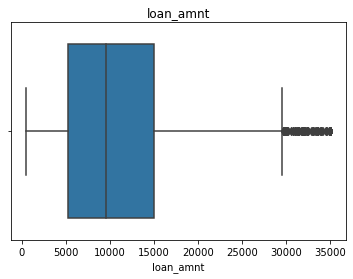

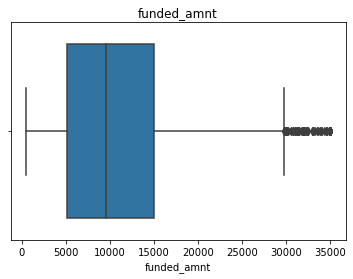

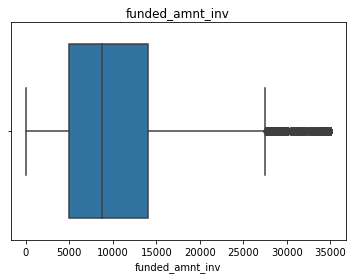

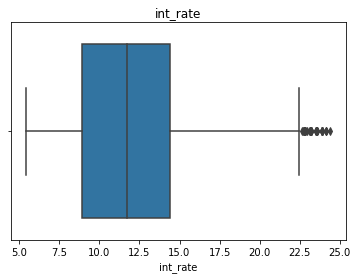

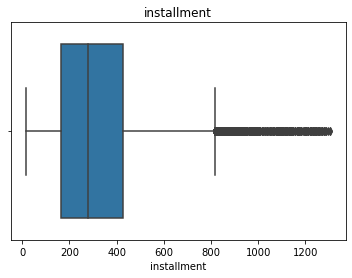

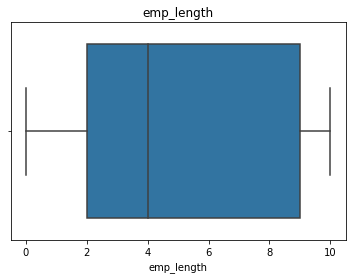

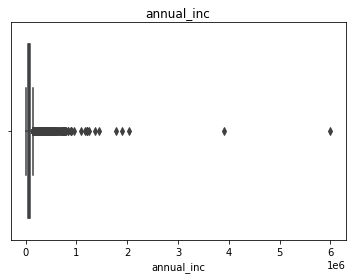

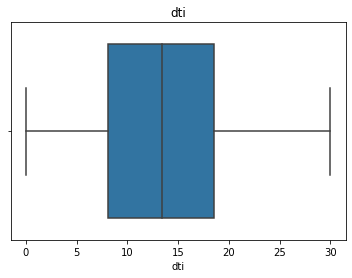

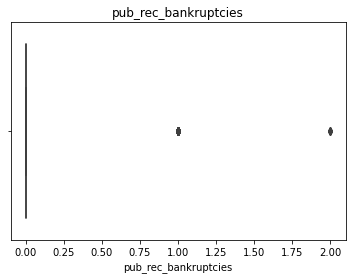

In [29]:
# outlier detection for continuous variables
for i in cont_cols:
    plt.title(i)
    sns.boxplot(df[i])
    plt.show()

There is need of removing outlier for annual_inc column

In [30]:
# finding out quartiles for annual inc column
df['annual_inc'].quantile([0.5,0.75,0.8,0.9,0.95,1])


0.50      58868.0
0.75      82000.0
0.80      90000.0
0.90     115000.0
0.95     140004.0
1.00    6000000.0
Name: annual_inc, dtype: float64

In [31]:
df = df[df['annual_inc'] < df['annual_inc'].quantile(0.95)]
df.shape


(36642, 21)

Observations : 
Though outlier is present, Data looks continuous for loan_amnt, funded_amnt, funded_amnt_inv, int_rate and installment columns.
So need for Outlier treatment for this columns.
However for 'annual_inc column' outlier treatment might be necessary, but not mandatory.
In this analysis, No outlier treatment is done

### categorization of continous columns

In [60]:
df['bin_loan_amnt'] = pd.cut(df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
df['bin_funded_amnt'] = pd.cut(df['funded_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
df['bin_funded_amnt_inv'] = pd.cut(df['funded_amnt_inv'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
df['bin_installment'] = pd.cut(df['installment'], bins=14,precision =0,labels=['0-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800--900','900-1000','1000-1100','1100-1200','1200-1300','1300-1400'])
df['bin_annual_inc'] = pd.cut(df['annual_inc'], bins=6,precision =0,labels=['0-1lac','1lac-2lac','2lac-3lac','3lac-4lac','4lac-5lac','5lac-6lac'])
df['bin_dti'] = pd.cut(df['dti'], bins=6,precision =0,labels=['0-5','5-10','10-15','15-20','20-25','25-30'])


# 3) Data Analysis and Visualization

## Univariate Analysis

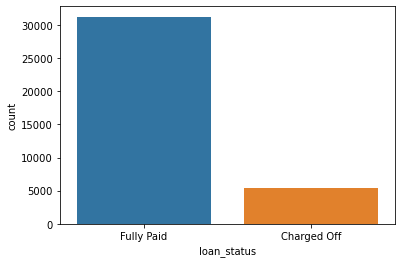

In [33]:
# plotting loan_status Countplot

sns.countplot(df["loan_status"])
plt.show()

### Here we will be analyzing all categorical variables for loan_status = 'Charged off' 

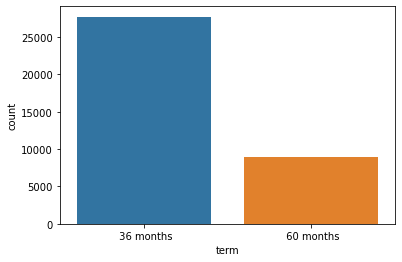

In [34]:
# Plotting countplot for 'term' for loan_status = 'Charged off' 

sns.countplot(df['term'], data = df[df['loan_status']=='Charged Off'])
plt.show()

Observation : There are more defaulters for 36 months term

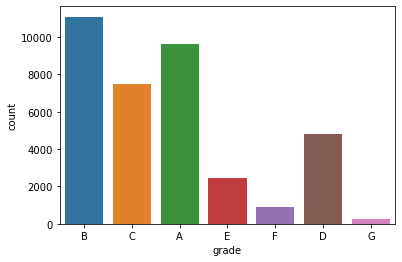

In [35]:
# Plotting countplot for 'grade' for loan_status = 'Charged off' 

sns.countplot(df['grade'], data = df[df['loan_status']=='Charged Off'])
plt.show()

Observation : There are more defaulters for 'B' grade Applicants

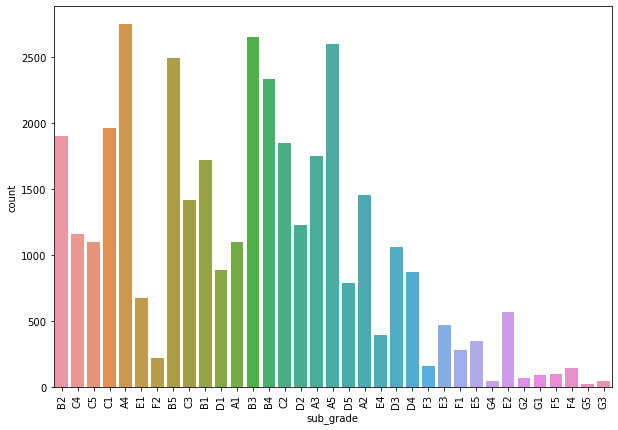

In [36]:
# Plotting countplot for 'sub_grade' for loan_status = 'Charged off' 
fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(df['sub_grade'], data = df[df['loan_status']=='Charged Off'])
plt.xticks(rotation = 90)
plt.show()

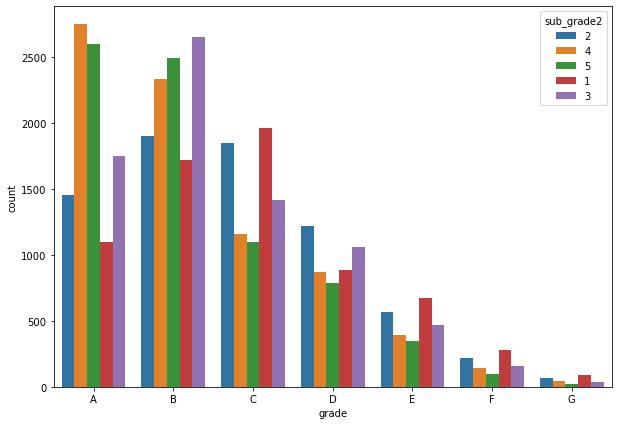

In [37]:
# Plotting grade for 
df['sub_grade2'] = df['sub_grade'].apply(lambda x: x[-1])
fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(df['grade'], order = ['A','B','C','D','E','F','G'],hue = df['sub_grade2'], data = df[df['loan_status']=='Charged Off'])
plt.show()

Observation

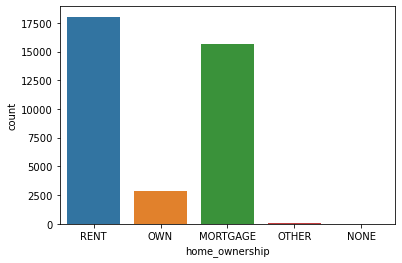

In [38]:
# Plotting countplot for 'home_ownership' for loan_status = 'Charged off' 

sns.countplot(df['home_ownership'], data = df[df['loan_status']=='Charged Off'])
plt.show()

In [39]:
df['home_ownership'].value_counts()

RENT        18029
MORTGAGE    15666
OWN          2852
OTHER          92
NONE            3
Name: home_ownership, dtype: int64

Observation : Applicants having home_ownership 'Rent' have high chances of loan defaulting

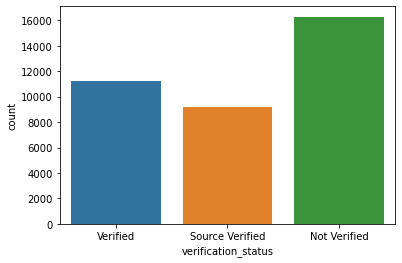

In [40]:
# Plotting countplot for 'verification_status' for loan_status = 'Charged off' 

sns.countplot(df['verification_status'], data = df[df['loan_status']=='Charged Off'])
plt.show()

Observation : Applicants having verification_status 'Not verified' have high chances of loan defaulting

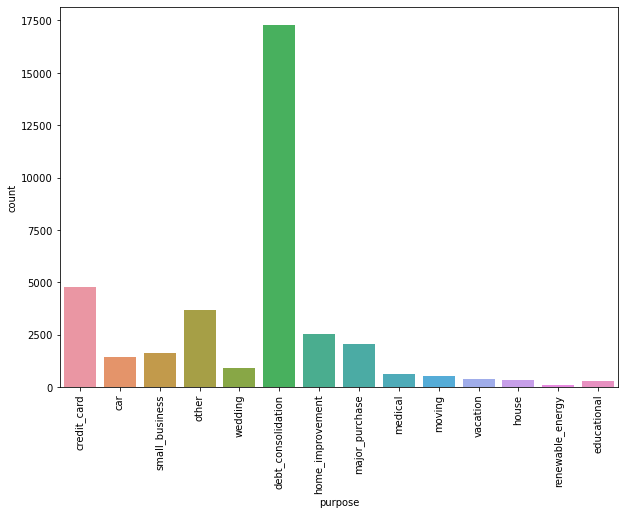

In [41]:
# Plotting countplot for 'purpose' for loan_status = 'Charged off' 

fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(df['purpose'], data = df[df['loan_status']=='Charged Off'])
plt.xticks(rotation = 90)
plt.show()

Observation : Applicants having purpose 'debt consolidation' have high chances of loan defaulting

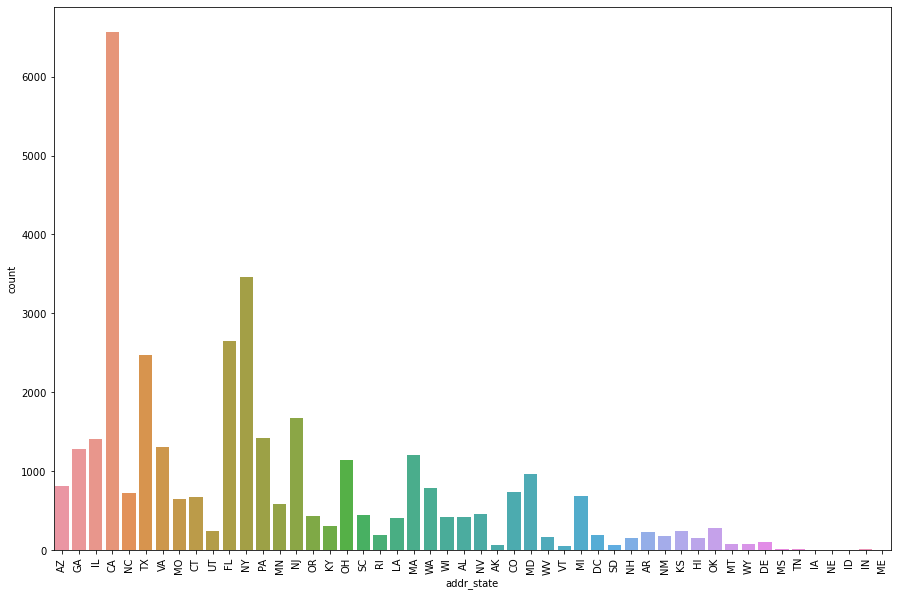

In [42]:
# Plotting countplot for 'addr_state' for loan_status = 'Charged off' 

fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(df['addr_state'], data = df[df['loan_status']=='Charged Off'])
plt.xticks(rotation = 90)
plt.show()

Observation : Applicants having address state 'AZ' have high chances of loan defaulting

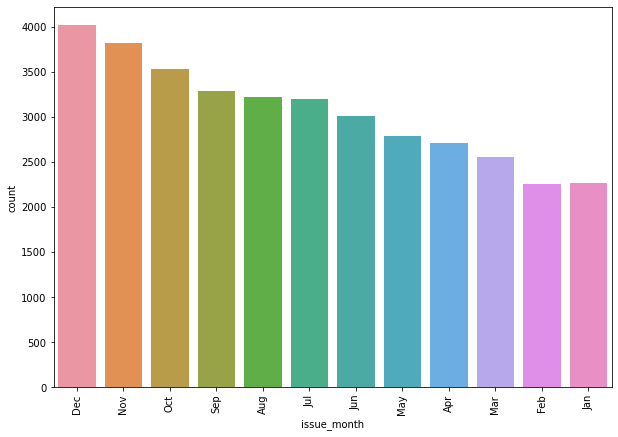

In [43]:
# Plotting countplot for 'issue_month' for loan_status = 'Charged off' 

fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(df['issue_month'], data = df[df['loan_status']=='Charged Off'])

plt.xticks(rotation = 90)
plt.show()

Observation : Loans issued in month 'december' have high chances of loan default

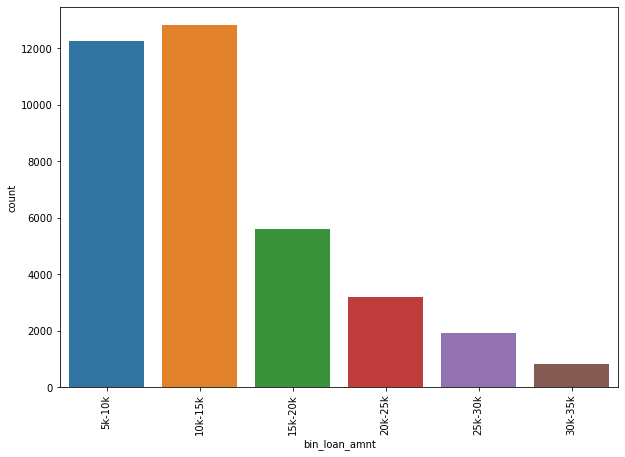

In [44]:
# Plotting countplot for 'issue_month' for loan_status = 'Charged off' 

fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(df['bin_loan_amnt'], data = df[df['loan_status']=='Charged Off'])

plt.xticks(rotation = 90)
plt.show()

Observation : Loans issued for loan amount group 10k-20k have high chances of loan default

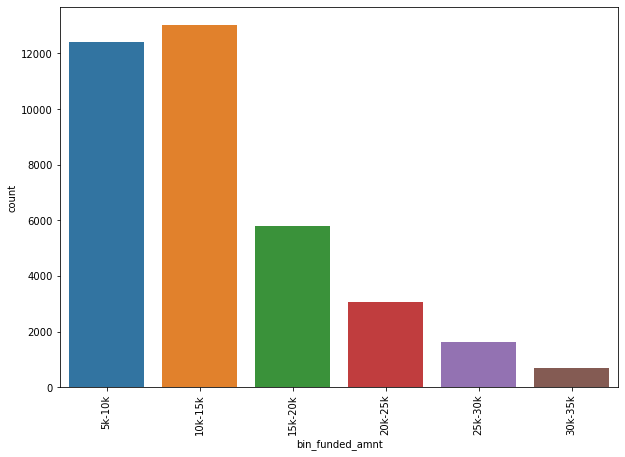

In [45]:
# Plotting countplot for 'issue_month' for loan_status = 'Charged off' 

fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(df['bin_funded_amnt'], data = df[df['loan_status']=='Charged Off'])

plt.xticks(rotation = 90)
plt.show()

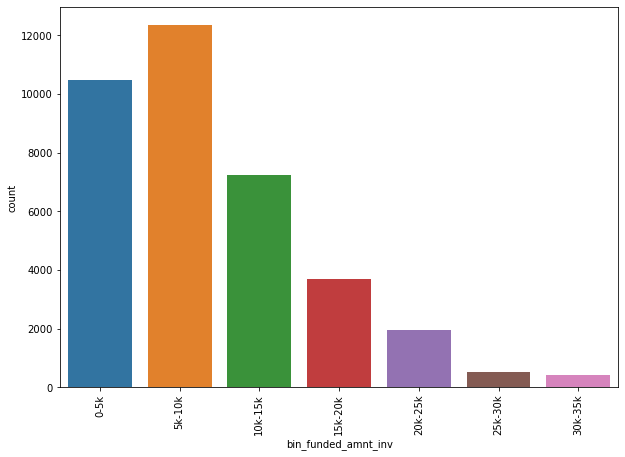

In [46]:
# Plotting countplot for 'issue_month' for loan_status = 'Charged off' 

fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(df['bin_funded_amnt_inv'], data = df[df['loan_status']=='Charged Off'])

plt.xticks(rotation = 90)
plt.show()

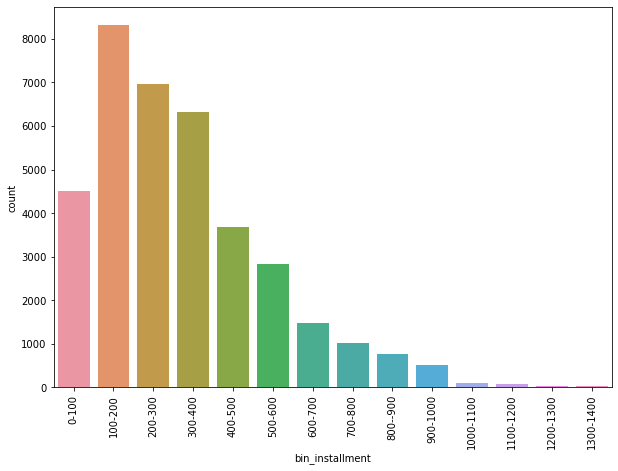

In [47]:
# Plotting countplot for 'issue_month' for loan_status = 'Charged off' 

fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(df['bin_installment'], data = df[df['loan_status']=='Charged Off'])

plt.xticks(rotation = 90)
plt.show()

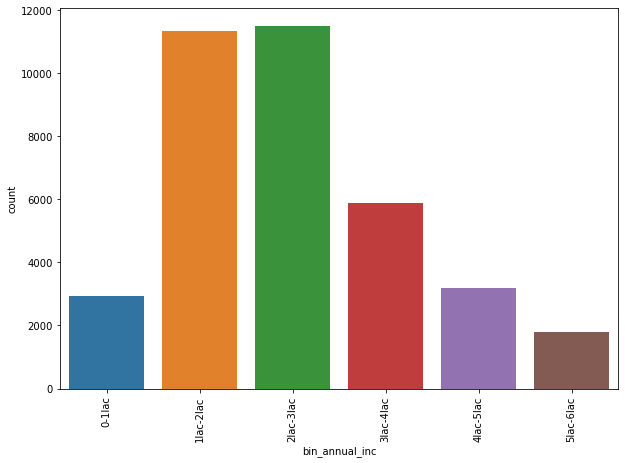

In [48]:
# Plotting countplot for 'issue_month' for loan_status = 'Charged off' 

fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(df['bin_annual_inc'], data = df[df['loan_status']=='Charged Off'])

plt.xticks(rotation = 90)
plt.show()

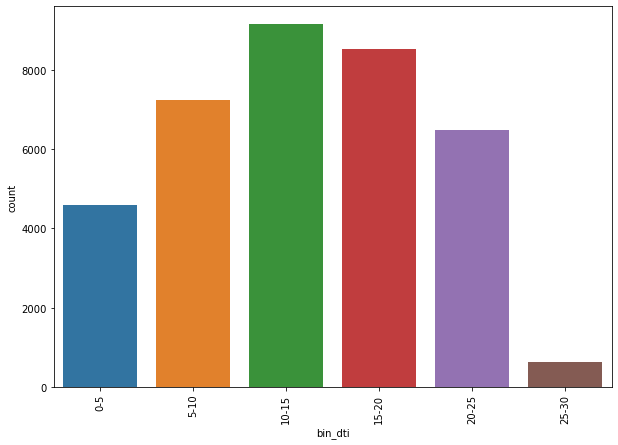

In [62]:
# Plotting countplot for 'dti' for loan_status = 'Charged off' 

fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(df['bin_dti'], data = df[df['loan_status']=='Charged Off'])

plt.xticks(rotation = 90)
plt.show()

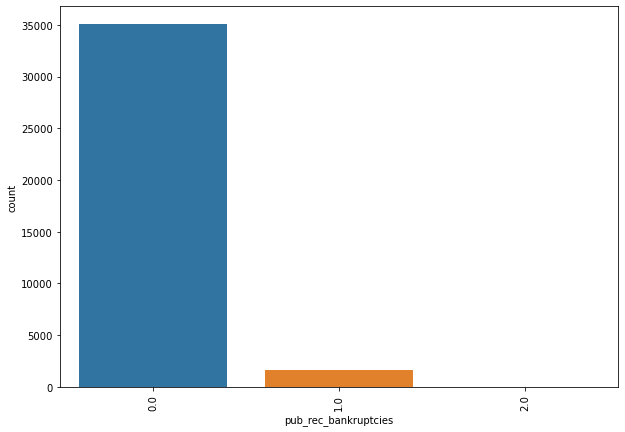

In [63]:
# Plotting countplot for 'pub_rec_bankruptcies' for loan_status = 'Charged off' 

fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(df['pub_rec_bankruptcies'], data = df[df['loan_status']=='Charged Off'])

plt.xticks(rotation = 90)
plt.show()

## Insights

## Bivariate Analysis

In [65]:
print(cont_cols,cat_cols)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'pub_rec_bankruptcies'] ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state']


### 1) Analyzing 'loan_amnt' variable against different categorical variables

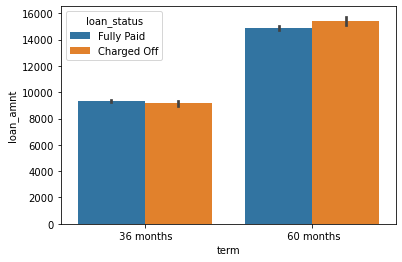

In [68]:
# Plotting loan amnt and term together
sns.barplot(y=df['loan_amnt'], x = df['term'], hue = df['loan_status'])
plt.show()

Obaservation

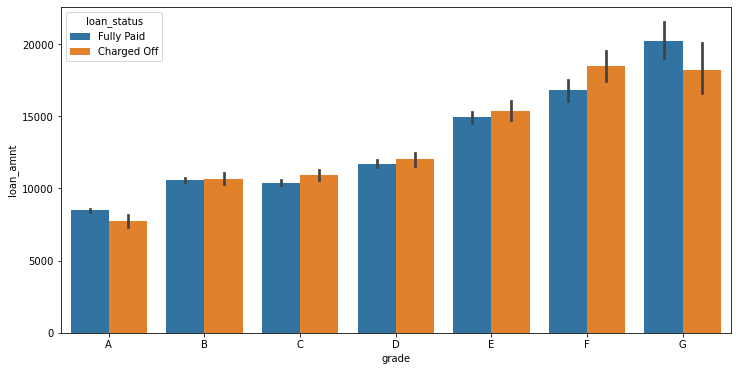

In [73]:
# Plotting loan amnt and grade together
plt.figure(figsize=(12,6))
sns.barplot(y=df['loan_amnt'], x = df['grade'], order = ['A','B','C','D','E','F','G'],hue = df['loan_status'])
plt.show()

observation

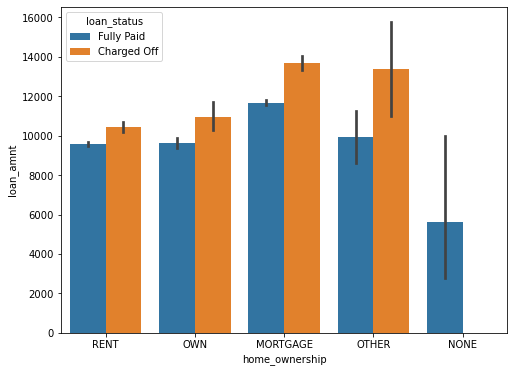

In [76]:
# Plotting loan amnt and home)ownership together
plt.figure(figsize=(8,6))
sns.barplot(y=df['loan_amnt'], x = df['home_ownership'],hue = df['loan_status'])
plt.show()

Obseervation

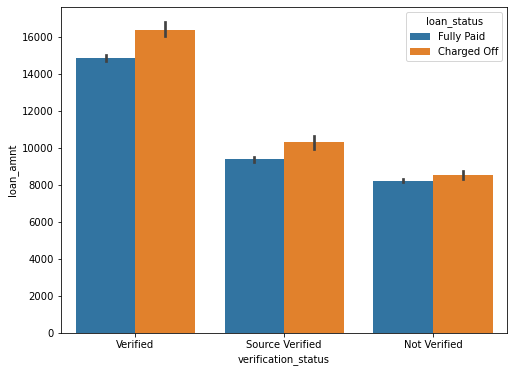

In [77]:
# Plotting loan amnt and verification_status together
plt.figure(figsize=(8,6))
sns.barplot(y=df['loan_amnt'], x = df['verification_status'],hue = df['loan_status'])
plt.show()

Observation

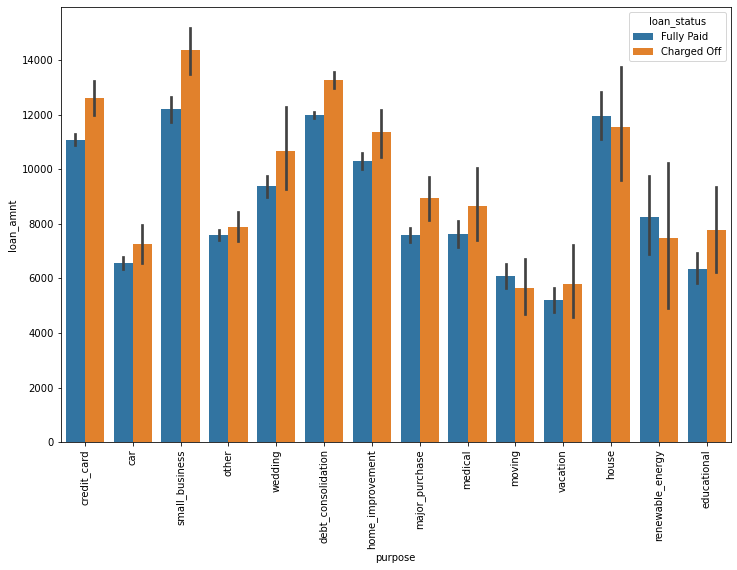

In [81]:
# Plotting loan amnt and purpose together
plt.figure(figsize=(12,8))
sns.barplot(y=df['loan_amnt'], x = df['purpose'],hue = df['loan_status'])
plt.xticks(rotation = 90)
plt.show()

Observation

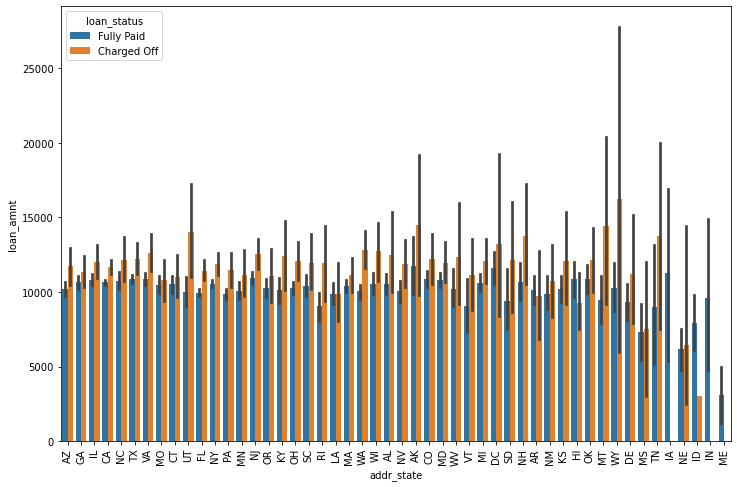

In [82]:
# Plotting loan amnt and addr_state together
plt.figure(figsize=(12,8))
sns.barplot(y=df['loan_amnt'], x = df['addr_state'],hue = df['loan_status'])
plt.xticks(rotation = 90)
plt.show()

Observation

### 2) Analyzing 'int_rate' variable against different categorical variables

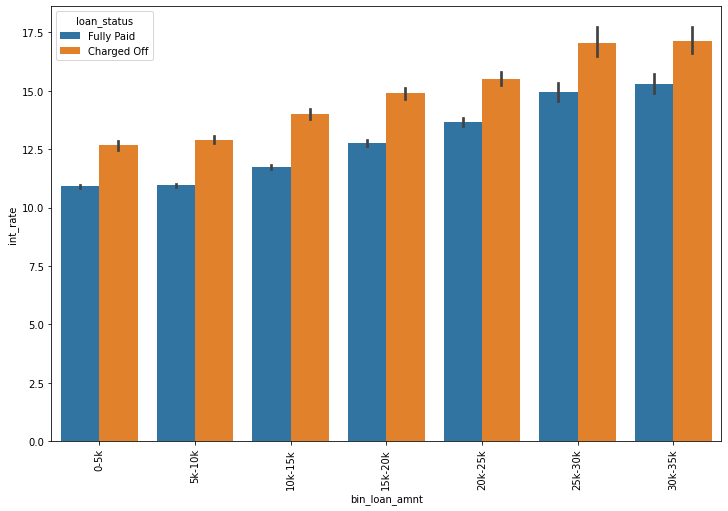

In [84]:
# Plotting int_rate and bin_loan_amnt together
plt.figure(figsize=(12,8))
sns.barplot(y=df['int_rate'], x = df['bin_loan_amnt'],hue = df['loan_status'])
plt.xticks(rotation = 90)
plt.show()

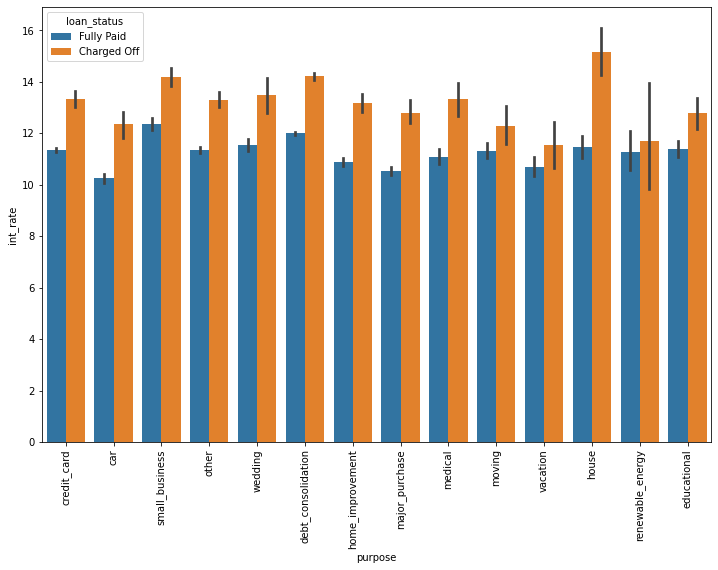

In [86]:
# Plotting int_rate and purpose together
plt.figure(figsize=(12,8))
sns.barplot(y=df['int_rate'], x = df['purpose'],hue = df['loan_status'])
plt.xticks(rotation = 90)
plt.show()

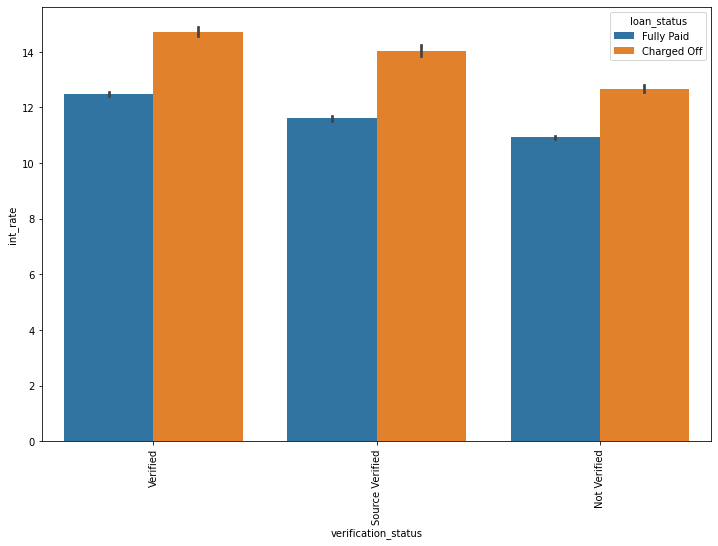

In [87]:
# Plotting int_rate and verification_status together
plt.figure(figsize=(12,8))
sns.barplot(y=df['int_rate'], x = df['verification_status'],hue = df['loan_status'])
plt.xticks(rotation = 90)
plt.show()

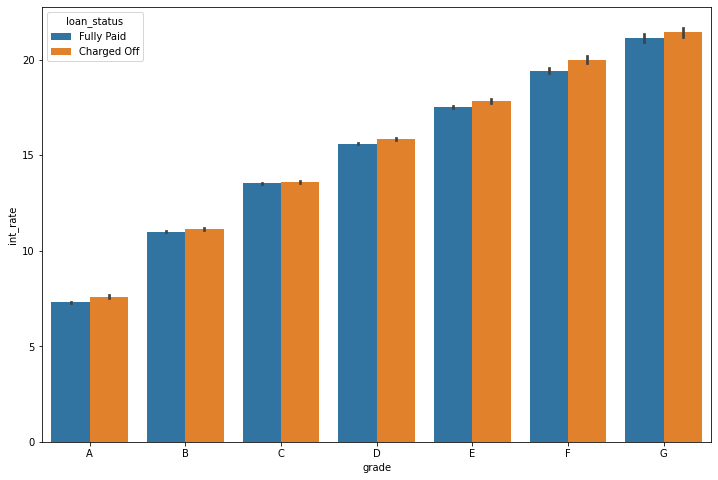

In [90]:
# Plotting int_rate and grade together
plt.figure(figsize=(12,8))
sns.barplot(y=df['int_rate'], x = df['grade'],order = ['A','B','C','D','E','F','G'], hue = df['loan_status'])

plt.show()

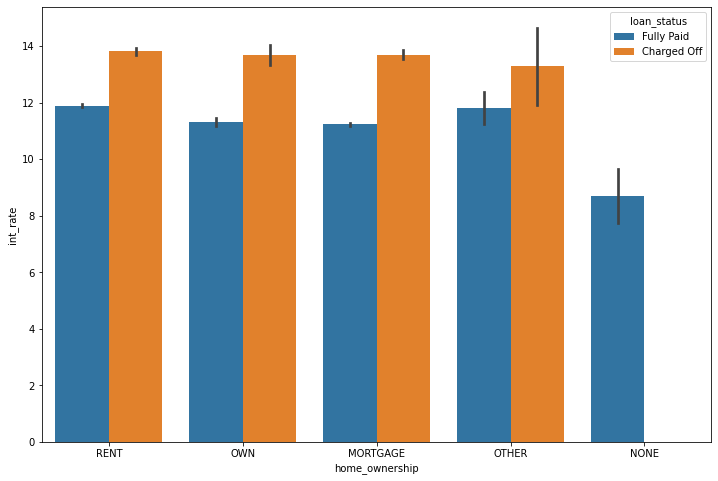

In [93]:
# Plotting int_rate and home_ownership together
plt.figure(figsize=(12,8))
sns.barplot(y=df['int_rate'], x = df['home_ownership'], hue = df['loan_status'])
plt.show()

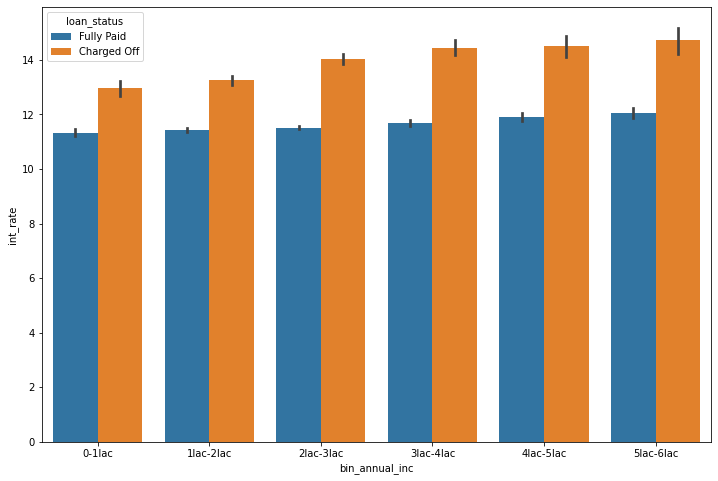

In [94]:
# Plotting int_rate and bin_annual_inc together
plt.figure(figsize=(12,8))
sns.barplot(y=df['int_rate'], x = df['bin_annual_inc'], hue = df['loan_status'])
plt.show()

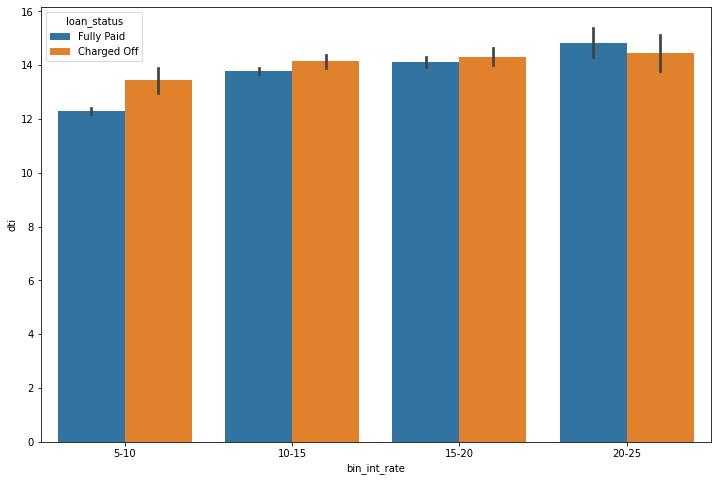

In [96]:
# Plotting bin_int_rate and dti together
plt.figure(figsize=(12,8))
sns.barplot(x=df['bin_int_rate'], y = df['dti'], hue = df['loan_status'])
plt.show()

### 3) Analyzing 'annual_inc' variable against different categorical variables

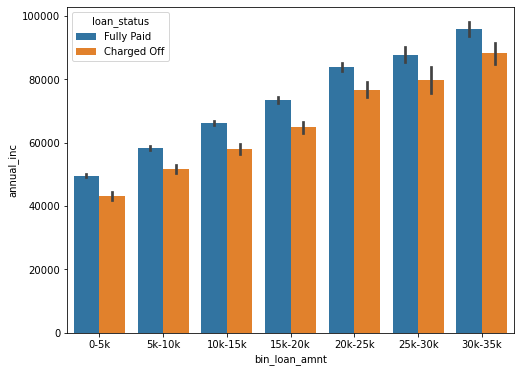

In [98]:
# Plotting annual_inc and bin_loan_amnt  together
plt.figure(figsize=(8,6))
sns.barplot(x=df['bin_loan_amnt'], y = df['annual_inc'], hue = df['loan_status'])
plt.show()

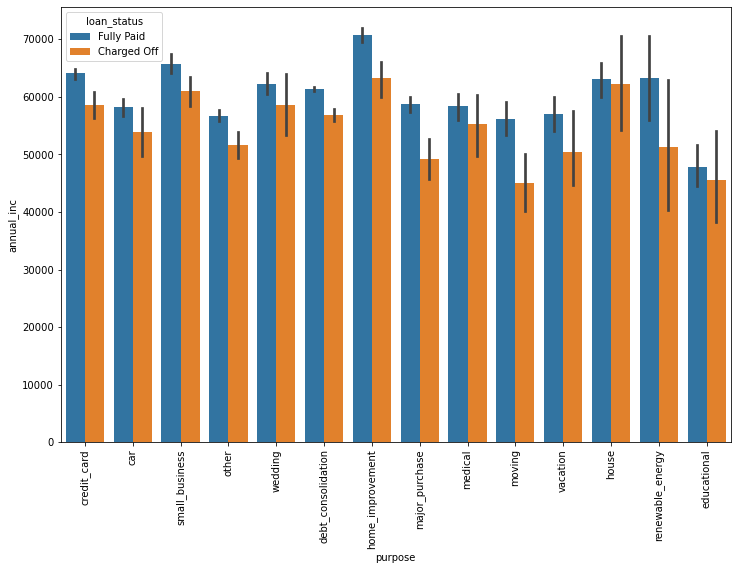

In [101]:
# Plotting annual_inc and purpose  together
plt.figure(figsize=(12,8))
sns.barplot(x=df['purpose'], y = df['annual_inc'], hue = df['loan_status'])
plt.xticks(rotation=90)
plt.show()

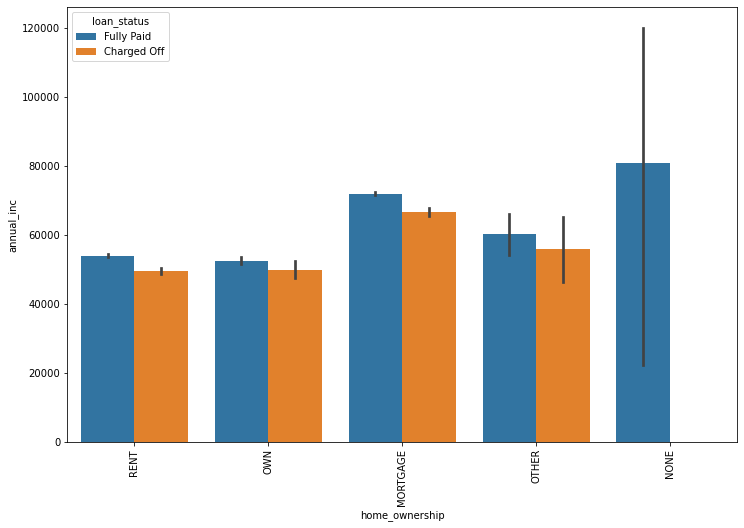

In [102]:
# Plotting annual_inc and home_ownership  together
plt.figure(figsize=(12,8))
sns.barplot(x=df['home_ownership'], y = df['annual_inc'], hue = df['loan_status'])
plt.show()

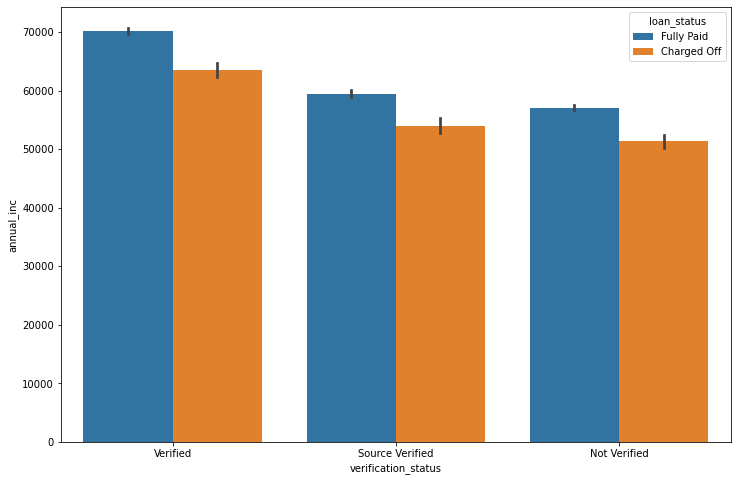

In [104]:
# Plotting annual_inc and verification_status  together
plt.figure(figsize=(12,8))
sns.barplot(x=df['verification_status'], y = df['annual_inc'], hue = df['loan_status'])
plt.show()

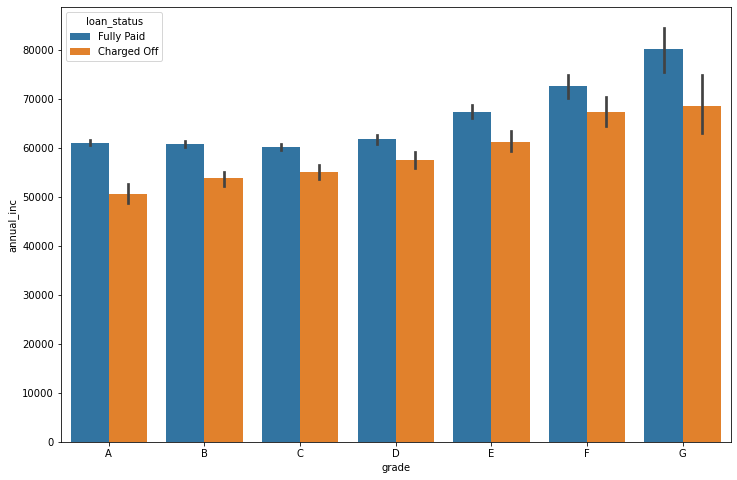

In [106]:
# Plotting annual_inc and verification_status  together
plt.figure(figsize=(12,8))
sns.barplot(x=df['grade'], y = df['annual_inc'], order = ['A','B','C','D','E','F','G'], hue = df['loan_status'])
plt.show()

### 4) Analyzing other variable against different categorical variables

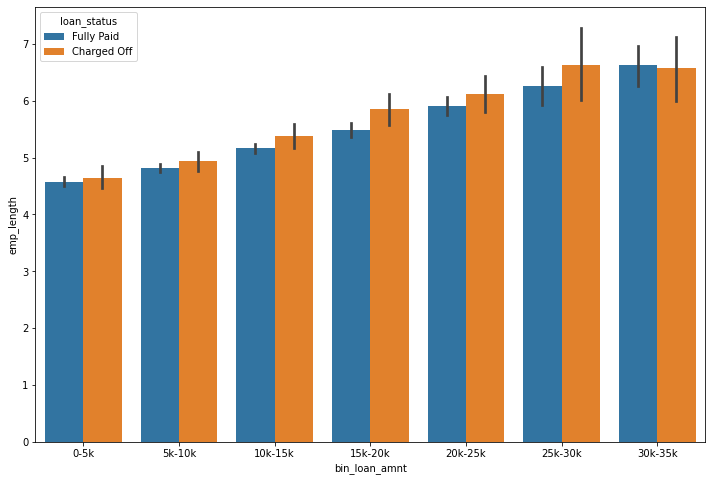

In [107]:
# Plotting annual_inc and verification_status  together
plt.figure(figsize=(12,8))
sns.barplot(x=df['bin_loan_amnt'], y = df['emp_length'], hue = df['loan_status'])
plt.show()

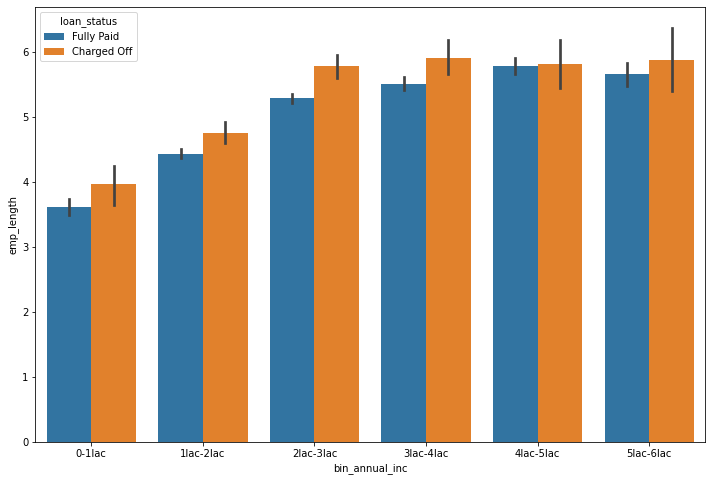

In [108]:
# Plotting annual_inc and verification_status  together
plt.figure(figsize=(12,8))
sns.barplot(x=df['bin_annual_inc'], y = df['emp_length'], hue = df['loan_status'])
plt.show()

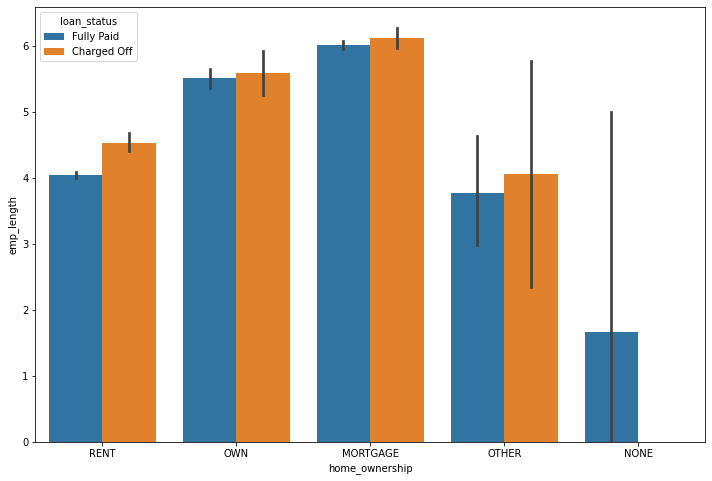

In [109]:
# Plotting annual_inc and verification_status  together
plt.figure(figsize=(12,8))
sns.barplot(x=df['home_ownership'], y = df['emp_length'], hue = df['loan_status'])
plt.show()